<a href="https://colab.research.google.com/github/Ajay-2007/deep-learning-projects/blob/master/3.implementing_neural_network_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [0]:
X, y = sklearn.datasets.make_moons(200, noise=0.15) 

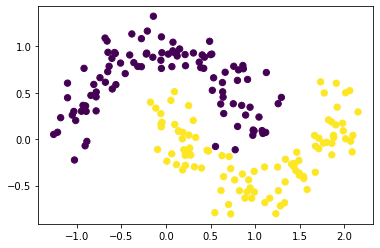

In [109]:
plt.scatter(X[:, 0],X[:, 1], c = y, s = 40)

In [110]:
X.shape

(200, 2)

In [0]:
input_neurons = 2
output_neurons = 2
samples = X.shape[0]
learning_rate = 0.001
lamda_reg = 0.01

In [112]:
model_dict = {'W1' : W1, 'b1' : b1, 'W2' : W2, 'b2' : b2}

NameError: ignored

In [0]:
def retreive(model_dict):
  W1 = model_dict['W1']
  W2 = model_dict['W2']
  b1 = model_dict['b1']
  b2 = model_dict['b2']
  return W1, b1, W2, b2

In [0]:
def forward(X, model_dict):
  W1, b1, W2, b2 = retreive(model_dict)
  z1 = X.dot(W1) + b1
  a1 = np.tanh(z1)
  z2 = a1.dot(W2)
  a2 = np.tanh(z2)
  exp_scores = np.exp(a2)
  softmax = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
  return z1, a1, softmax



In [0]:
 def loss(softmax, y, model_dict):
   W1, b1, W2, b2  = retreive(model_dict)
   m = np.zeros(200)

   for i, correct_index in enumerate(y):
     predicted = softmax[i][correct_index]
     m[i] = predicted


   log_prob = -np.log(predicted)
   softmax_loss = np.sum(log_prob)
   reg_loss = lamda_reg / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
   loss = softmax_loss + reg_loss
   return float(loss / y.shape[0])

In [0]:
 def predict(X, model_dict): 
   W1, b1, W2, b2 = retreive(model_dict)
   z1 = X.dot(W1) + b1
   a1 = np.tanh(z1)
   z2 = a1.dot(W2)
   a2 = np.tanh(z2)
   exp_scores = np.exp(a2)

   softmax = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
   print('This is a debugging information --> ', softmax)
   return z1, a1, np.argmax(softmax, axis = 1)

In [0]:
 def backpropogation(x, y, model_dict, epochs):
   for i in range(epochs):
     W1, b1, W2, b2 = retreive(model_dict)
     z1, a1, probs = forward(x, model_dict)
     delta3 = np.copy(probs)
     delta3[range(y.shape[0]), y] -= 1  # (200, 2)  delta = probs - 1
     dW2 = (a1.T).dot(delta3)   # a1: (3, 200) dot (200, 2) --> (3, 2)
     db2 = np.sum(delta3, axis=0, keepdims=True)  # (1, 2)
     delta2 = delta3.dot(W2.T) * (1-np.power(np.tanh(z1), 2))
     dW1 = np.dot(x.T, delta2)
     db1 = np.sum(delta2, axis=0)
     # Add regularization terms
     dW2 += lamda_reg * np.sum(W2)
     dW1 += lamda_reg * np.sum(W1)

     # Update Weights
     W1 += (-learning_rate * dW1)
     b1 += (-learning_rate * db1)
     W2 += (-learning_rate * dW2)
     b2 += (-learning_rate * db2)        # W = W + (-lr * gradient) = W - lr * gradient


     # Update the model dictionary
     model_dict = {'W1' : W1, 'b1' : b1, 'W2' : W2, 'b2' : b2}

     # Print Loss every 50 epochs
     if i % 50 == 0:
       print('Loss at epoch {} is : {:.3f}'.format(i, loss(probs, y, model_dict)))

In [0]:
 def init_network(input_dim, hidden_dim, output_dim):
   model = {}
   W1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)
   b1 = np.zeros((1, hidden_dim))
   W2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
   b2 = np.zeros((1, output_dim))

   model['W1'] = W1
   model['b1'] = b1
   model['W2'] = W2
   model['b2'] = b2
   return model

In [135]:
model_dict = init_network(input_dim=input_neurons, hidden_dim=3, output_dim=output_neurons)
model = backpropogation(X, y, model_dict, 1500) 

Loss at epoch 0 is : 0.001
Loss at epoch 50 is : 0.001
Loss at epoch 100 is : 0.001
Loss at epoch 150 is : 0.002
Loss at epoch 200 is : 0.002
Loss at epoch 250 is : 0.002
Loss at epoch 300 is : 0.003
Loss at epoch 350 is : 0.003
Loss at epoch 400 is : 0.004
Loss at epoch 450 is : 0.004
Loss at epoch 500 is : 0.005
Loss at epoch 550 is : 0.006
Loss at epoch 600 is : 0.007
Loss at epoch 650 is : 0.008
Loss at epoch 700 is : 0.009
Loss at epoch 750 is : 0.011
Loss at epoch 800 is : 0.012
Loss at epoch 850 is : 0.014
Loss at epoch 900 is : 0.015
Loss at epoch 950 is : 0.017
Loss at epoch 1000 is : 0.019
Loss at epoch 1050 is : 0.021
Loss at epoch 1100 is : 0.023
Loss at epoch 1150 is : 0.025
Loss at epoch 1200 is : 0.028
Loss at epoch 1250 is : 0.030
Loss at epoch 1300 is : 0.033
Loss at epoch 1350 is : 0.036
Loss at epoch 1400 is : 0.039
Loss at epoch 1450 is : 0.042
